<a href="https://colab.research.google.com/github/khaisu/GIFT/blob/main/DA_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functional Capstone Project - Data & Analytics



## Business Context

**Infini Telco** is a prominent player in the telco industry with a strong presence in Malaysia. Specializing in B2B sales, they serve as a vital link in the supply chain, facilitating the distribution of telecommunication and technology products to retailers, service providers, and other businesses across the continent.

Despite their market dominance and expansive product offerings, the company faces critical business challenge related to marketing strategy. A key aspect of this involves the ***identification and segmentation of their customer base into well-defined segments based on discernible patterns in product purchase behaviour and understand their product portfolio.*** By understanding the distinct needs, preferences, and purchasing habits of different customer segments, the client can develop targeted marketing strategies that cater to the specific needs of each segment, enhancing customer satisfaction and loyalty, driving revenue growth.




## Business Challenges

- No streamlined process to handle data and data is only available in chunks
- Limited intel on customer purchase patterns to drive targeted marketing
- Inadequate product insights across different customer groups


## Project Objectives

The business needs your help as a ***data analyst*** to overcome these challenges. Apply your data analytics skillset learnt.



### 1. Data Preprocessing

Data preparation is a critical process first step, involving the gathering, cleaning, transforming, and organizing of raw data into a format suitable for analysis. This step is essential for ensuring the quality and reliability of the insights derived from the data.

Here, the transaction data is provided from June 2020 to December 2022, which are stored across three separate csv files. The dataset are:

- Transactions_1.csv
- Transactions_2.csv
- Transactions_3.csv

***Task 1.1: Combine the transaction data files***

Find a way to combine the above data together into a singular dataframe, that will contain all the transactions at one place. Name this singular dataframe df_Txn_full.

In [ ]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 100

In [ ]:
#Load transaction data files
df_Txn1 = pd.read_csv("D:\GIFT\Capstone\Transactions_1.csv", encoding='unicode_escape')
df_Txn2 = pd.read_csv("D:\GIFT\Capstone\Transactions_2.csv", encoding='unicode_escape')
df_Txn3 = pd.read_csv("D:\GIFT\Capstone\Transactions_3.csv", encoding='unicode_escape')

In [ ]:
#Combine all transaction data files into one dataframe
df_Txn_full = pd.concat([df_Txn1, df_Txn2, df_Txn3])

In [ ]:
#Peek into the data
df_Txn_full.head()

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,000000000000100095,ZSV,0.00,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,0
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1


**Validation checkpoints:**
Consider, you would have received some information from the business on:

- Gross Annual Turnover for this period to be ~$1.4B
- The total unique products are ~190000
- The total customer base is ~7k

***Task 1.1.1***:

Use the above information to validate the data creation process. This is to ensure that no records of data are lost in the process.

In [ ]:
# 1. Validate Gross Annual Turnover (~$1.4B or 1,400,000,000)
total_turnover = df_Txn_full['GROSS_TURNOVER'].sum()
print(f"Calculated Total Gross Turnover: ${total_turnover:,.2f}")
print(f"Validation Checkpoint: Gross Annual Turnover should be ~$1.4B\n")

# 2. Validate Total Unique Products (~190,000)
unique_products = df_Txn_full['PRODUCT'].nunique()
print(f"Calculated Total Unique Products: {unique_products:,}")
print(f"Validation Checkpoint: Total unique products should be ~190,000\n")

# 3. Validate Total Customer Base (~7k or 7,000)
unique_customers = df_Txn_full['CUSTOMER_NUMBER'].nunique()
print(f"Calculated Total Customer Base: {unique_customers:,}")
print(f"Validation Checkpoint: Total customer base should be ~7k")

Calculated Total Gross Turnover: $1,466,478,196.72
Validation Checkpoint: Gross Annual Turnover should be ~$1.4B

Calculated Total Unique Products: 191,394
Validation Checkpoint: Total unique products should be ~190,000

Calculated Total Customer Base: 7,130
Validation Checkpoint: Total customer base should be ~7k


***Task 1.2: Join the mapping files to the transaction data***


Mapping files contain supplementary detailed information that will be used for our analysis.
Use these mapping files to join with the above transaction data to create the master dataset <br><br>
**List of mapping files and their primary keys:**<br>
1. Customer Characteristics : to be joined on Customer Number
2. Customer Type Mapping : to be joined on Main Account ID
3. Product Category Mapping : to be joined on Product ID

To ensure that the joins are performed accurately, it is a good practice to clean up the columns upon which the join is performed.
Some recommended steps to clean up a column are:

- ensuring the values are of the same data type
- removing leading zeroes
- removing leading and trailing whitespaces etc.


***Task 1.2.1:***

Here, before, performing the joins, you have to perform an intermediary step to clean up the below columns based on the above recommended steps:

- customer_number
- Product
- Main_account
- Invoice_Number

*Hint: Check for any leading or trailing 0s or white spaces.*

In [ ]:
columns_to_clean = ['CUSTOMER_NUMBER', 'PRODUCT', 'Main_account', 'INVOICE_NUMBER']

# --- Step 1: Converting to string and removing whitespaces ---
for col in columns_to_clean:
    # 1. Ensure the values are of string data type and remove any leading/trailing whitespaces
    df_Txn_full[col] = df_Txn_full[col].astype(str).str.strip()

# --- Step 2: Removing leading zeroes ---
for col in columns_to_clean:
    # 2. Remove leading zeroes (essential for ID-like columns to match join keys)
    df_Txn_full[col] = df_Txn_full[col].str.lstrip('0')

df_Txn_full[columns_to_clean].head()

,CUSTOMER_NUMBER,PRODUCT,Main_account,INVOICE_NUMBER
0,14816,100095,14816,124289578
1,17566,100095,17566,124317609
2,17566,100095,17566,124317609
3,17566,100095,17566,124317609
4,17566,100095,17566,124317609


***Task 1.2.2:***

Import the mapping files and rename the dataframe:

- Customer Characteristics.csv : df_CustChar
- Customer Type Mapping.csv : df_CustType
- Product Categories.csv : df_ProdCategories

In [ ]:
df_CustChar = pd.read_csv("D:\GIFT\Capstone\Customer Characteristics.csv", encoding='unicode_escape')
df_CustType = pd.read_csv("D:\GIFT\Capstone\Customer Type Mapping.csv", encoding='unicode_escape')
df_ProdCategories = pd.read_csv("D:\GIFT\Capstone\Product Categories.csv", encoding='unicode_escape')

print("df_CustChar Head:")
display(df_CustChar.head())

print("df_CustType Head:")
display(df_CustType.head())

print("df_ProdCategories Head:")
display(df_ProdCategories.head())

df_CustChar Head:


,CUSTOMER_NAME,CUSTOMER_NUMBER,ACCOUNT_GROUP_TXT,CVR_Company_status
0,CUSTOMER_NAME_0,35016,Debtors,Normal
1,CUSTOMER_NAME_1,38336,Debtors,Normal
2,CUSTOMER_NAME_2,38438,Debtors,Normal
3,CUSTOMER_NAME_3,45001,Debtors,Normal
4,CUSTOMER_NAME_2,45005,Debtors,Normal


df_CustType Head:


,Main_account_ID,Customer_type
0,10014,A-B
1,10025,A-B
2,10033,A-B
3,10048,D
4,10056,C


df_ProdCategories Head:


,ProductID,ProductCategoryID,ProdCat2,ProdCat1
0,000000010001151351,739,Web Conferencing Services,Communication Tools
1,000000010000802665,739,Web Conferencing Services,Communication Tools
2,000000000614529000,739,Web Conferencing Services,Communication Tools
3,000000000617092230,739,Web Conferencing Services,Communication Tools
4,000000000605040414,739,Web Conferencing Services,Communication Tools


***Task 1.2.3:***

To perform join on the dataframes, it is important to clean the columns to ensure that the columns are free from any special characters.

- Remove any leading or trailing 0s in Customer_Number column in the df_CustChar dataframe.
- Check for duplicates in the data and remove any duplicates.
- Create a master dataframe by performing appropriate join on df_CustChar dataframe and df_Txn_full dataframe. Rename the master dataframe as df_Master.



In [ ]:
# --- 1. Define the correct join column names (Confirmed to be the same in both after initial cleaning) ---
CUSTOMER_COL = 'CUSTOMER_NUMBER'

# --- 2. Clean the df_CustChar mapping file ---
print("--- Cleaning df_CustChar ---")
print(f"df_CustChar initial shape: {df_CustChar.shape[0]:,} rows")

# a. Convert to string, remove leading/trailing whitespaces, and remove leading zeros
df_CustChar[CUSTOMER_COL] = df_CustChar[CUSTOMER_COL].astype(str).str.strip().str.lstrip('0')

# b. Check for duplicates and remove them
duplicates_before = df_CustChar.duplicated().sum()
df_CustChar.drop_duplicates(inplace=True)

print(f"Duplicates removed from df_CustChar: {duplicates_before:,}")
print(f"df_CustChar cleaned shape: {df_CustChar.shape[0]:,} rows\n")


# --- 3. Create Master DataFrame (df_Master) ---
print("--- Merging DataFrames to create df_Master ---")

# Merge: Since the keys are the same ('CUSTOMER_NUMBER'), they will be renamed to _x and _y.
df_Master = pd.merge(
    df_Txn_full,
    df_CustChar,
    on=CUSTOMER_COL,  # Use 'on' when join keys are the same name
    how='left'
)

# RENAME STEP: The column from df_Txn_full is now 'CUSTOMER_NUMBER_x'. We rename it back.
df_Master.rename(columns={'CUSTOMER_NUMBER_x': 'CUSTOMER_NUMBER'}, inplace=True)

# DROP STEP: Drop the redundant column from df_CustChar, which is now 'CUSTOMER_NUMBER_y'
df_Master.drop(columns=['CUSTOMER_NUMBER_y'], inplace=True, errors='ignore')

print(f"Shape of df_Txn_full before merge: {df_Txn_full.shape}")
print(f"Shape of df_Master after merge: {df_Master.shape}")

display(df_Master.head())

--- Cleaning df_CustChar ---
df_CustChar initial shape: 7,130 rows
Duplicates removed from df_CustChar: 0
df_CustChar cleaned shape: 7,130 rows

--- Merging DataFrames to create df_Master ---
Shape of df_Txn_full before merge: (1353671, 12)
Shape of df_Master after merge: (1353671, 15)


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,0.00,1,CUSTOMER_NAME_1429,Debtors,Normal
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1,CUSTOMER_NAME_573,Debtors,Normal
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,0,CUSTOMER_NAME_573,Debtors,Normal
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1,CUSTOMER_NAME_573,Debtors,Normal
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1,CUSTOMER_NAME_573,Debtors,Normal


***Task 1.2.4:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [ ]:
CUSTOMER_ID_COLUMN = 'CUSTOMER_NUMBER'

total_turnover_master = df_Master['GROSS_TURNOVER'].sum()
print(f"Calculated Total Gross Turnover (df_Master): ${total_turnover_master:,.2f}")
print(f"Validation Checkpoint: Gross Annual Turnover should be ~$1.4B\n")

unique_customers_master = df_Master[CUSTOMER_ID_COLUMN].nunique()
print(f"Calculated Total Customer Base (df_Master): {unique_customers_master:,}")
print(f"Validation Checkpoint: Total customer base should be ~7k")

Calculated Total Gross Turnover (df_Master): $1,466,478,196.72
Validation Checkpoint: Gross Annual Turnover should be ~$1.4B

Calculated Total Customer Base (df_Master): 7,130
Validation Checkpoint: Total customer base should be ~7k


***Task 1.2.5:***

Now, you will be joining the df_CustType dataframe with the master dataframe.

- Remove any leading or trailing 0s in Main_account_ID column in the df_CustType dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_CustType dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [ ]:
# --- 1. Define the correct join column names ---
MASTER_COL = 'Main_account' # Column in df_Master (from df_Txn_full)
CUST_TYPE_COL = 'Main_account_ID' # Column in df_CustType (based on task description)

# --- 2. Clean the df_CustType mapping file ---
print("--- Cleaning df_CustType ---")
print(f"df_CustType initial shape: {df_CustType.shape[0]:,} rows")

# a. Convert to string, remove leading/trailing whitespaces, and remove leading zeros
df_CustType[CUST_TYPE_COL] = df_CustType[CUST_TYPE_COL].astype(str).str.strip().str.lstrip('0')

# b. Check for duplicates and remove them
duplicates_before = df_CustType.duplicated().sum()
df_CustType.drop_duplicates(inplace=True)

print(f"Duplicates removed from df_CustType: {duplicates_before:,}")
print(f"df_CustType cleaned shape: {df_CustType.shape[0]:,} rows\n")


# --- 3. Merge with df_Master ---
print("--- Merging df_CustType with df_Master ---")

# Perform a left join to retain all existing records in df_Master
df_Master = pd.merge(
    df_Master,
    df_CustType,
    left_on=MASTER_COL,    # Column in the master dataframe
    right_on=CUST_TYPE_COL, # Column in the customer type dataframe
    how='left'
)

# Drop the redundant column from df_CustType that was used for the join
df_Master.drop(columns=[CUST_TYPE_COL], inplace=True, errors='ignore')

print(f"Shape of df_Master after merge: {df_Master.shape}")

display(df_Master.head())

--- Cleaning df_CustType ---
df_CustType initial shape: 6,855 rows
Duplicates removed from df_CustType: 0
df_CustType cleaned shape: 6,855 rows

--- Merging df_CustType with df_Master ---
Shape of df_Master after merge: (1353671, 16)


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Customer_type
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,0.00,1,CUSTOMER_NAME_1429,Debtors,Normal,KAM
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1,CUSTOMER_NAME_573,Debtors,Normal,A-B
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,0,CUSTOMER_NAME_573,Debtors,Normal,A-B
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1,CUSTOMER_NAME_573,Debtors,Normal,A-B
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1,CUSTOMER_NAME_573,Debtors,Normal,A-B


***Task 1.2.6:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [ ]:
total_turnover_master = df_Master['GROSS_TURNOVER'].sum()
print(f"Calculated Total Gross Turnover (df_Master): ${total_turnover_master:,.2f}")
print(f"Validation Checkpoint: Gross Annual Turnover should be ~$1.4B\n")

unique_customers_master = df_Master['CUSTOMER_NUMBER'].nunique()
print(f"Calculated Total Customer Base (df_Master): {unique_customers_master:,}")
print(f"Validation Checkpoint: Total customer base should be ~7k")

Calculated Total Gross Turnover (df_Master): $1,466,478,196.72
Validation Checkpoint: Gross Annual Turnover should be ~$1.4B

Calculated Total Customer Base (df_Master): 7,130
Validation Checkpoint: Total customer base should be ~7k


***Task 1.2.7:***

Now, you will be joining the df_ProdCategories dataframe with the master dataframe.

- Remove any leading or trailing 0s in ProductID column in the df_ProdCategories dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_ProdCategories dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [ ]:
# --- 1. Define the correct join column names ---
MASTER_COL = 'PRODUCT' # Column in df_Master (from df_Txn_full)
PROD_CAT_COL = 'ProductID' # Column in df_ProdCategories (based on task description)

# --- 2. Clean the df_ProdCategories mapping file ---
print("--- Cleaning df_ProdCategories ---")
print(f"df_ProdCategories initial shape: {df_ProdCategories.shape[0]:,} rows")

# a. Convert to string, remove leading/trailing whitespaces, and remove leading zeros
df_ProdCategories[PROD_CAT_COL] = df_ProdCategories[PROD_CAT_COL].astype(str).str.strip().str.lstrip('0')

# b. Check for duplicates and remove them
duplicates_before = df_ProdCategories.duplicated().sum()
df_ProdCategories.drop_duplicates(inplace=True)

print(f"Duplicates removed from df_ProdCategories: {duplicates_before:,}")
print(f"df_ProdCategories cleaned shape: {df_ProdCategories.shape[0]:,} rows\n")


# --- 3. Merge with df_Master ---
print("--- Merging df_ProdCategories with df_Master ---")

# Perform a left join to retain all existing records in df_Master
df_Master = pd.merge(
    df_Master,
    df_ProdCategories,
    left_on=MASTER_COL,    # Column in the master dataframe
    right_on=PROD_CAT_COL, # Column in the product categories dataframe
    how='left'
)

# Drop the redundant column from df_ProdCategories that was used for the join
df_Master.drop(columns=[PROD_CAT_COL], inplace=True, errors='ignore')

print(f"Shape of df_Master after merge: {df_Master.shape}")

display(df_Master.head())

--- Cleaning df_ProdCategories ---
df_ProdCategories initial shape: 210,028 rows
Duplicates removed from df_ProdCategories: 0
df_ProdCategories cleaned shape: 210,028 rows

--- Merging df_ProdCategories with df_Master ---
Shape of df_Master after merge: (1353671, 19)


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Customer_type,ProductCategoryID,ProdCat2,ProdCat1
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,0.00,1,CUSTOMER_NAME_1429,Debtors,Normal,KAM,8.00,Music Streaming Services,Television and Entertainment
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,0,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment


***Task 1.2.8:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k
- The total product is ~15k

In [ ]:
total_turnover_master = df_Master['GROSS_TURNOVER'].sum()
print(f"Calculated Total Gross Turnover (df_Master): ${total_turnover_master:,.2f}")
print(f"Validation Checkpoint: Gross Annual Turnover should be ~$1.4B\n")

unique_customers_master = df_Master['CUSTOMER_NUMBER'].nunique()
print(f"Calculated Total Customer Base (df_Master): {unique_customers_master:,}")
print(f"Validation Checkpoint: Total customer base should be ~7k\n")

unique_products_master = df_Master['PRODUCT'].nunique()
print(f"Calculated Total Unique Products (df_Master): {unique_products_master:,}")
print(f"Validation Checkpoint: Total unique products should be ~15k")

Calculated Total Gross Turnover (df_Master): $1,466,478,196.72
Validation Checkpoint: Gross Annual Turnover should be ~$1.4B

Calculated Total Customer Base (df_Master): 7,130
Validation Checkpoint: Total customer base should be ~7k

Calculated Total Unique Products (df_Master): 150,545
Validation Checkpoint: Total unique products should be ~15k


***Task 1.3: Data Cleaning***

A major part of data pre processing involves cleaning the data, removing nulls, filtering out irrelavant or less useful information. For example:

- Remove rows with missing product id
- Removing rows with negative or zero turnover
- Removing customers who interacted very less

As part of Data Cleaning of this dataset you are required to perform the following:

***Task 1.3.1: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase less frequently

In [ ]:
# 1. Calculate the total number of unique invoices (transactions) per customer
txn_counts = df_Master.groupby('CUSTOMER_NUMBER')['INVOICE_NUMBER'].nunique().reset_index()
# Rename the calculated column for clarity before merging
txn_counts.rename(columns={'INVOICE_NUMBER': 'Total_Invoices'}, inplace=True)

# 2. Merge the total unique transaction counts back into df_Master
df_Master = pd.merge(
    df_Master,
    txn_counts,
    on='CUSTOMER_NUMBER',
    how='left'
)

# 3. Create the Invoice_flag column using the calculated count
# Apply condition: 0 if Total_Invoices is 3 or less, 1 otherwise
df_Master['Invoice_flag'] = df_Master['Total_Invoices'].apply(lambda x: 0 if x <= 3 else 1)

# 4. Drop the temporary 'Total_Invoices' column
df_Master.drop(columns=['Total_Invoices'], inplace=True)

# Verification
print("Shape of df_Master after adding Invoice_flag:", df_Master.shape)
print("\nInvoice_flag value counts (should show distribution of low/high frequency customers):")
print(df_Master['Invoice_flag'].value_counts())

display(df_Master[['CUSTOMER_NUMBER', 'INVOICE_NUMBER', 'Invoice_flag']].head())

Shape of df_Master after adding Invoice_flag: (1353671, 20)

Invoice_flag value counts (should show distribution of low/high frequency customers):
Invoice_flag
1    1345997
0       7674
Name: count, dtype: int64


,CUSTOMER_NUMBER,INVOICE_NUMBER,Invoice_flag
0,14816,124289578,1
1,17566,124317609,1
2,17566,124317609,1
3,17566,124317609,1
4,17566,124317609,1


***Task 1.3.2: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase single SKU.

In [ ]:
# 1. Calculate the total number of unique products (SKUs) purchased per customer
# This addresses the task's intent to flag customers based on SKU purchase behavior.
sku_counts = df_Master.groupby('CUSTOMER_NUMBER')['PRODUCT'].nunique().reset_index()
# Rename the calculated column for clarity before merging
sku_counts.rename(columns={'PRODUCT': 'Unique_SKU_Count'}, inplace=True)

# 2. Merge the unique SKU counts back into df_Master
df_Master = pd.merge(
    df_Master,
    sku_counts,
    on='CUSTOMER_NUMBER',
    how='left'
)

# 3. Create the SKU_Purchase_Flag column
# Apply condition: 0 if Unique_SKU_Count is 3 or less, 1 otherwise
df_Master['SKU_Purchase_Flag'] = df_Master['Unique_SKU_Count'].apply(lambda x: 0 if x <= 3 else 1)

# 4. Drop the temporary 'Unique_SKU_Count' column
df_Master.drop(columns=['Unique_SKU_Count'], inplace=True)

# Verification
print("Shape of df_Master after adding SKU_Purchase_Flag:", df_Master.shape)
print("\nSKU_Purchase_Flag value counts (should show distribution of low/high product diversity customers):")
print(df_Master['SKU_Purchase_Flag'].value_counts())

display(df_Master[['CUSTOMER_NUMBER', 'SKU_Purchase_Flag']].head())

Shape of df_Master after adding SKU_Purchase_Flag: (1353671, 21)

SKU_Purchase_Flag value counts (should show distribution of low/high product diversity customers):
SKU_Purchase_Flag
1    1349203
0       4468
Name: count, dtype: int64


,CUSTOMER_NUMBER,SKU_Purchase_Flag
0,14816,1
1,17566,1
2,17566,1
3,17566,1
4,17566,1


There are a few records in the dataset whose Product ID are null. These records won't map to product information from the mapping file and hence these records will not be useful for the analysis.

***Task 1.3.3: In the master data, remove records where Product ID is null and save it in a dataframe df_Filtered***

In [ ]:
import numpy as np

# 1. Store the shape of the original DataFrame for comparison
initial_shape = df_Master.shape

# 2. Re-handle potential missing values in the 'PRODUCT' column
# Since 'PRODUCT' was cleaned to string earlier, we must account for different ways nulls may appear.
df_Master['PRODUCT'] = df_Master['PRODUCT'].replace(['nan', 'NaN', 'null', 'NULL', ''], np.nan)

# 3. Filter out records where 'PRODUCT' is null/missing (NaN)
# .copy() is used to ensure df_Filtered is a new, independent DataFrame
df_Filtered = df_Master.dropna(subset=['PRODUCT']).copy()

# 4. Print verification
print(f"df_Master initial shape: {initial_shape}")
print(f"df_Filtered shape after removing null PRODUCT IDs: {df_Filtered.shape}")
print(f"Number of rows removed: {initial_shape[0] - df_Filtered.shape[0]}")

# Verification of nulls in df_Filtered
print("\nNull counts for 'PRODUCT' in df_Filtered:", df_Filtered['PRODUCT'].isnull().sum())

display(df_Filtered.head())

df_Master initial shape: (1353671, 21)
df_Filtered shape after removing null PRODUCT IDs: (1353671, 21)
Number of rows removed: 0

Null counts for 'PRODUCT' in df_Filtered: 0


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Customer_type,ProductCategoryID,ProdCat2,ProdCat1,Invoice_flag,SKU_Purchase_Flag
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,...,1,CUSTOMER_NAME_1429,Debtors,Normal,KAM,8.00,Music Streaming Services,Television and Entertainment,1,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment,1,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,0,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment,1,1
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment,1,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment,1,1


There are a few records that lack information on product category and will not be useful for the analysis

***Task 1.3.4: In the df_Filtered dataftame, remove records where Product Category information is null***


In [ ]:
# Assuming the column containing the Product Category information is 'PRODUCT_CATEGORY'.
# If your column is named differently (e.g., 'Product_Category', 'Category'), please change this variable.
PRODUCT_CATEGORY_COLUMN = 'ProductCategoryID'

# 1. Store the shape of the original DataFrame for comparison
initial_shape = df_Filtered.shape

# 2. Filter out records where the Product Category column is null (NaN)
df_Filtered = df_Filtered.dropna(subset=[PRODUCT_CATEGORY_COLUMN]).copy()

# 3. Print verification
print(f"df_Filtered shape before removing null categories: {initial_shape}")
print(f"df_Filtered shape after removing null categories: {df_Filtered.shape}")
print(f"Number of rows removed: {initial_shape[0] - df_Filtered.shape[0]}")

# Verification of nulls in df_Filtered
print(f"\nNull counts for '{PRODUCT_CATEGORY_COLUMN}' in df_Filtered:", df_Filtered[PRODUCT_CATEGORY_COLUMN].isnull().sum())

display(df_Filtered.head())

df_Filtered shape before removing null categories: (1353671, 21)
df_Filtered shape after removing null categories: (1351470, 21)
Number of rows removed: 2201

Null counts for 'ProductCategoryID' in df_Filtered: 0


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Customer_type,ProductCategoryID,ProdCat2,ProdCat1,Invoice_flag,SKU_Purchase_Flag
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,...,1,CUSTOMER_NAME_1429,Debtors,Normal,KAM,8.00,Music Streaming Services,Television and Entertainment,1,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment,1,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,0,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment,1,1
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment,1,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,A-B,8.00,Music Streaming Services,Television and Entertainment,1,1


There are some sales made to Internal accounts in the dataset. These sales can be removed from analysis as information on internal sales can distort the analysis of customer behaviour. Internal transactions do not reflect the actual market demand or customer preferences.

***Task 1.3.5: In the df_Filtered dataframe, remove records pertaining to sales to Internal Account***

*Hint: Check for Internal accounts in Account_Group_TXT field*

In [ ]:
# 1. Store the shape of the original DataFrame for comparison
initial_shape = df_Filtered.shape

# 2. Filter out rows where 'ACCOUNT_GROUP_TXT' contains "Internal" (case-insensitive)
# We use a tilde (~) for negation to keep rows that are NOT internal accounts.
# .str.contains() is useful for filtering text fields.
df_Filtered = df_Filtered[
    ~df_Filtered['ACCOUNT_GROUP_TXT'].str.contains('Internal', case=False, na=False)
].copy()

# 3. Print verification
print(f"df_Filtered shape before removing Internal Accounts: {initial_shape}")
print(f"df_Filtered shape after removing Internal Accounts: {df_Filtered.shape}")
print(f"Number of rows removed: {initial_shape[0] - df_Filtered.shape[0]}")


df_Filtered shape before removing Internal Accounts: (1351470, 21)
df_Filtered shape after removing Internal Accounts: (1351081, 21)
Number of rows removed: 389


As per business requirement, sales made to "ZSKA" and "ZDIR" are requested to be removed.

***Task 1.3.6: In the df_Filtered dataframe, remove records with position types "ZSKA" and "ZDIR"***

*Hint: Check column Position_type_order_line*

In [ ]:
position_types_to_remove = ["ZSKA", "ZDIR"]

# 1. Store the shape of the original DataFrame for comparison
initial_shape = df_Filtered.shape

# 2. Filter out rows where 'Position_type_order_line' is in the list of types to remove
# The expression uses a tilde (~) for negation to select rows NOT containing the specified types.
df_Filtered = df_Filtered[
    ~df_Filtered['Position_type_order_line'].isin(position_types_to_remove)
].copy()

# 3. Print verification
print(f"df_Filtered shape before removing ZSKA/ZDIR: {initial_shape}")
print(f"df_Filtered shape after removing ZSKA/ZDIR: {df_Filtered.shape}")
print(f"Number of rows removed: {initial_shape[0] - df_Filtered.shape[0]}")

# Verification: Check if the removed types still exist (should be 0)
remaining_removed_types = df_Filtered[
    df_Filtered['Position_type_order_line'].isin(position_types_to_remove)
].shape[0]
print(f"\nNumber of ZSKA/ZDIR records remaining: {remaining_removed_types}")

df_Filtered shape before removing ZSKA/ZDIR: (1351081, 21)
df_Filtered shape after removing ZSKA/ZDIR: (1302454, 21)
Number of rows removed: 48627

Number of ZSKA/ZDIR records remaining: 0


Some companies are currently not active or are in normal operation. It makes sense to exclude these companies from analysis. But, for companies whose status is unknown (null/na), we still retain them.

***Task 1.3.7: In the df_Filtered dataframe, remove records whose company status are not active/normal***

*Hint: Check column CVR_Company_status*

In [ ]:
# Task 1.3.7: Remove records whose company status are not active/normal

# Define the list of status values that are considered active/normal
# You may need to adjust this list based on the exact values in your data (e.g., 'ACTIVE', 'N')
active_statuses = ['Aktiv', 'Normal', 'Active', 'Normal status']

# 1. Store the shape of the original DataFrame for comparison
initial_shape = df_Filtered.shape

# 2. Filter out rows where 'CVR_Company_status' is NOT in the list of active statuses
# We use .isin() to select the rows we want to keep (the active ones).
df_Filtered = df_Filtered[
    df_Filtered['CVR_Company_status'].isin(active_statuses)
].copy()

# 3. Print verification
print(f"df_Filtered shape before removing inactive statuses: {initial_shape}")
print(f"df_Filtered shape after removing inactive statuses: {df_Filtered.shape}")
print(f"Number of rows removed: {initial_shape[0] - df_Filtered.shape[0]}")

# Verification: Show the remaining unique company statuses (should only be the active ones)
print("\nRemaining CVR_Company_status values:")
print(df_Filtered['CVR_Company_status'].value_counts())

df_Filtered shape before removing inactive statuses: (1302454, 21)
df_Filtered shape after removing inactive statuses: (1218122, 21)
Number of rows removed: 84332

Remaining CVR_Company_status values:
CVR_Company_status
Normal    1089575
Active     128547
Name: count, dtype: int64


There might be some records where Gross Turnover is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.8: In the df_Filtered dataframe, remove records where Gross Turnover is zero or negative***

In [ ]:
# The column to filter is 'GROSS_TURNOVER'
TURNOVER_COLUMN = 'GROSS_TURNOVER'

# 1. Store the shape of the original DataFrame for comparison
initial_shape = df_Filtered.shape

# 2. Filter out rows where 'GROSS_TURNOVER' is less than or equal to zero (<= 0)
# This keeps only rows where turnover is strictly positive (> 0).
df_Filtered = df_Filtered[
    df_Filtered[TURNOVER_COLUMN] > 0
].copy()

# 3. Print verification
print(f"df_Filtered shape before removing non-positive turnover: {initial_shape}")
print(f"df_Filtered shape after removing non-positive turnover: {df_Filtered.shape}")
print(f"Number of rows removed: {initial_shape[0] - df_Filtered.shape[0]}")

# Verification: Check min value of turnover (should be positive)
min_turnover = df_Filtered[TURNOVER_COLUMN].min()
print(f"\nMinimum GROSS_TURNOVER remaining: {min_turnover:.2f}")

df_Filtered shape before removing non-positive turnover: (1218122, 21)
df_Filtered shape after removing non-positive turnover: (1189752, 21)
Number of rows removed: 28370

Minimum GROSS_TURNOVER remaining: 0.01


There might be some records where Amount is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.9: In the df_Filtered dataframe, remove records where Amount is zero or negative***


In [ ]:
# The column to filter is 'AMOUNT'
AMOUNT_COLUMN = 'AMOUNT'

# 1. Store the shape of the original DataFrame for comparison
initial_shape = df_Filtered.shape

# 2. Filter out rows where 'AMOUNT' is less than or equal to zero (<= 0)
# This keeps only rows where the amount is strictly positive (> 0).
df_Filtered = df_Filtered[
    df_Filtered[AMOUNT_COLUMN] > 0
].copy()

# 3. Print verification
print(f"df_Filtered shape before removing non-positive amount: {initial_shape}")
print(f"df_Filtered shape after removing non-positive amount: {df_Filtered.shape}")
print(f"Number of rows removed: {initial_shape[0] - df_Filtered.shape[0]}")

# Verification: Check min value of amount (should be positive)
min_amount = df_Filtered[AMOUNT_COLUMN].min()
print(f"\nMinimum AMOUNT remaining: {min_amount:.2f}")

df_Filtered shape before removing non-positive amount: (1189752, 21)
df_Filtered shape after removing non-positive amount: (1010252, 21)
Number of rows removed: 179500

Minimum AMOUNT remaining: 1.00


Remember, you had created a column to flag the customers whose number of transactions are 3 or less than that. Customers with very few transactions may introduce noise into the data, making it harder to identify meaningful patterns and trends. Filtering out these customers results in a cleaner dataset, which enhances the accuracy and reliability of the analysis.

***Task 1.3.10: In the df_Filtered dataframe, filter out customers who have made 3 or fewer transactions***

*Hint: Utilize the Invoice_flag column created earlier.*

In [ ]:
# 1. Store the shape of the original DataFrame for comparison
initial_shape = df_Filtered.shape

# 2. Filter the DataFrame
df_Filtered = df_Filtered[
    df_Filtered['Invoice_flag'] == 1
].copy()

# 3. Print verification
print(f"df_Filtered shape before filtering low-frequency customers: {initial_shape}")
print(f"df_Filtered shape after filtering low-frequency customers: {df_Filtered.shape}")
print(f"Number of rows (transactions) removed: {initial_shape[0] - df_Filtered.shape[0]}")

# 4. Check the number of unique customers remaining
initial_customers = df_Master['CUSTOMER_NUMBER'].nunique()
remaining_customers = df_Filtered['CUSTOMER_NUMBER'].nunique()

print(f"\nTotal unique customers initially in df_Master: {initial_customers:,}")
print(f"Total unique customers remaining in df_Filtered: {remaining_customers:,}")

df_Filtered shape before filtering low-frequency customers: (1010252, 21)
df_Filtered shape after filtering low-frequency customers: (1005183, 21)
Number of rows (transactions) removed: 5069

Total unique customers initially in df_Master: 7,130
Total unique customers remaining in df_Filtered: 4,633


You had also created a column to flag the customers who purchased only one sku. Such records in the data also tends to add noise and is necesary to filter these customers out.

***Task 1.3.11: In the df_Filtered dataframe, filter out customers who have purchased only a single SKU***

*Hint: Utilize the SKU_flag column created earlier.*

In [ ]:
# 1. Store the shape of the original DataFrame for comparison
initial_shape = df_Filtered.shape

# 2. Filter the DataFrame
df_Filtered = df_Filtered[
    df_Filtered['SKU_Purchase_Flag'] == 1
].copy()

# 3. Print verification
print(f"df_Filtered shape before filtering low SKU diversity customers: {initial_shape}")
print(f"df_Filtered shape after filtering low SKU diversity customers: {df_Filtered.shape}")
print(f"Number of rows (transactions) removed: {initial_shape[0] - df_Filtered.shape[0]}")

# 4. Check the number of unique customers remaining
remaining_customers = df_Filtered['CUSTOMER_NUMBER'].nunique()
print(f"\nTotal unique customers remaining in df_Filtered: {remaining_customers:,}")

df_Filtered shape before filtering low SKU diversity customers: (1005183, 21)
df_Filtered shape after filtering low SKU diversity customers: (1004197, 21)
Number of rows (transactions) removed: 986

Total unique customers remaining in df_Filtered: 4,546


There are some information from the business and the business aligned on the fact that some very large customers are outliers and having them in the data could skew the analysis results. Hence, they should be filtered out. These customer types are denoted by KAM (Key Account Management).

***Task 1.3.12: In the df_Filtered dataframe, Filter out "Key" customer accounts***

*Hint: Check Customer_type column*

In [ ]:
# Assuming the 'Key' customer designation is simply the string "Key" in the Customer_type column.
KEY_CUSTOMER_TYPE = 'Key'

# 1. Store the shape of the original DataFrame for comparison
initial_shape = df_Filtered.shape

# 2. Filter the DataFrame to keep only non-Key customers
# The tilde (~) is used for negation to filter OUT the rows where Customer_type matches "Key".
df_Filtered = df_Filtered[
    ~df_Filtered['Customer_type'].str.contains(KEY_CUSTOMER_TYPE, case=False, na=False)
].copy()

# 3. Print verification
print(f"df_Filtered shape before filtering Key accounts: {initial_shape}")
print(f"df_Filtered shape after filtering Key accounts: {df_Filtered.shape}")
print(f"Number of rows (transactions) removed: {initial_shape[0] - df_Filtered.shape[0]}")

# 4. Check the unique customer count remaining
remaining_customers = df_Filtered['CUSTOMER_NUMBER'].nunique()
print(f"\nTotal unique customers remaining in df_Filtered: {remaining_customers:,}")

df_Filtered shape before filtering Key accounts: (1004197, 21)
df_Filtered shape after filtering Key accounts: (1004197, 21)
Number of rows (transactions) removed: 0

Total unique customers remaining in df_Filtered: 4,546


**With the above steps of data preprocessing, you now get a cleaned data set which will be used for further analysis.**

### 2. Data Transformation


***Task 2.1: Based on what you have learnt previously, perform a series of standard EDA to gain a better understanding of the data***

--- 1. Data Structure and Quality Check ---
Filtered Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1004197 entries, 530 to 1353670
Data columns (total 21 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   INDEX                          1004197 non-null  int64  
 1   INVOICE_NUMBER                 1004197 non-null  object 
 2   INVOICE_ITEM                   1004197 non-null  int64  
 3   DOCUMENT_DATE                  1004197 non-null  object 
 4   CUSTOMER_NUMBER                1004197 non-null  object 
 5   Main_account                   1004197 non-null  object 
 6   Main_account_name              1004197 non-null  object 
 7   Main_resposible_employee_name  1004197 non-null  object 
 8   PRODUCT                        1004197 non-null  object 
 9   Position_type_order_line       1004197 non-null  object 
 10  GROSS_TURNOVER                 1004197 non-null  float64
 11  AMOUNT         

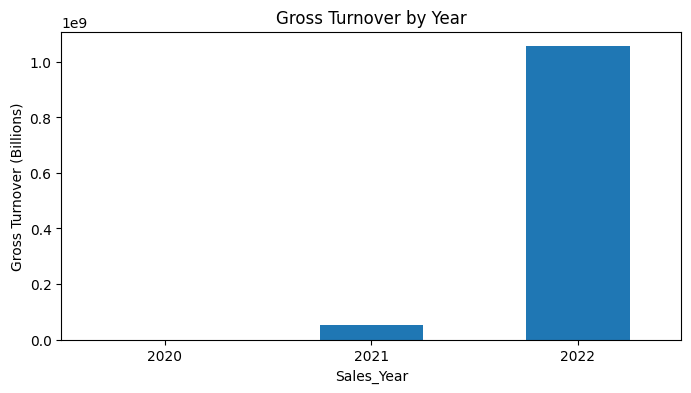


--- Gross Turnover Distribution (Log Scale) ---


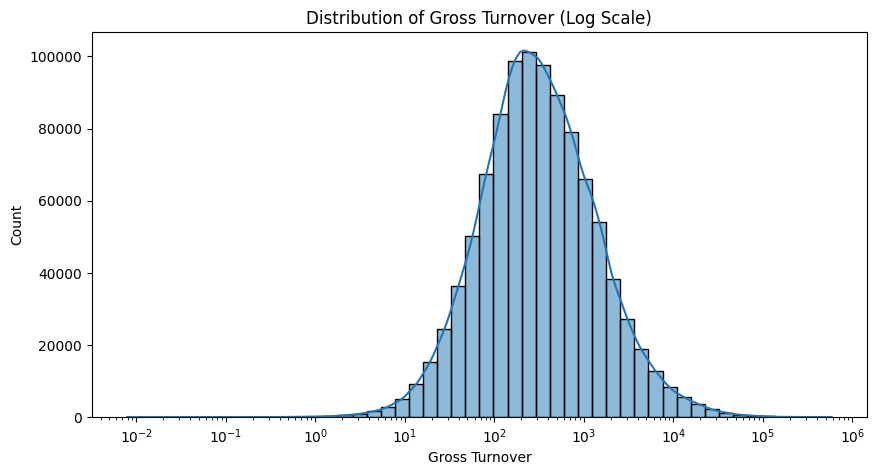


--- Top 10 Customers by Total Gross Turnover ---
CUSTOMER_NUMBER
140125    $13,079,887
21876     $10,754,643
590220    $10,310,875
401301    $10,263,199
11967      $9,003,214
710044     $8,703,852
32367      $8,631,877
41935      $8,583,418
15047      $7,943,240
101063     $7,538,087
Name: GROSS_TURNOVER, dtype: object

--- Top 5 ProductCategoryID by Total Gross Turnover ---
ProductCategoryID
806.00    $68,231,286
218.00    $49,977,621
200.00    $47,131,864
601.00    $36,060,095
600.00    $30,850,156
Name: GROSS_TURNOVER, dtype: object

--- Distribution of Customer_type ---
Customer_type
A-B    686444
KAM    176408
D       70648
C       66143
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("--- 1. Data Structure and Quality Check ---")
print("Filtered Data Info:")
df_Filtered.info()

print("\nFiltered Data Descriptive Statistics:")
# Analyze the distribution of key numerical columns
print(df_Filtered[['GROSS_TURNOVER', 'AMOUNT', 'Invoice_flag', 'SKU_Purchase_Flag']].describe())

# Check unique counts for key categorical/ID columns
print("\nUnique Counts for Key IDs and Categories:")
print(f"Unique Customers: {df_Filtered['CUSTOMER_NUMBER'].nunique()}")
print(f"Unique Products: {df_Filtered['PRODUCT'].nunique()}")
print(f"Unique Main Accounts: {df_Filtered['Main_account'].nunique()}")

# --- 2. Time-Based Analysis (Transaction Trends) ---
# Ensure DOCUMENT_DATE is in datetime format and extract the year/month
if df_Filtered['DOCUMENT_DATE'].dtype != '<M8[ns]':
    df_Filtered['DOCUMENT_DATE'] = pd.to_datetime(df_Filtered['DOCUMENT_DATE'], errors='coerce')

df_Filtered['Sales_Year'] = df_Filtered['DOCUMENT_DATE'].dt.year
df_Filtered['Sales_Month'] = df_Filtered['DOCUMENT_DATE'].dt.to_period('M')

print("\n--- Sales Trend by Year ---")
yearly_sales = df_Filtered.groupby('Sales_Year')['GROSS_TURNOVER'].sum()
print(yearly_sales)

# Plotting yearly sales trend
plt.figure(figsize=(8, 4))
yearly_sales.plot(kind='bar')
plt.title('Gross Turnover by Year')
plt.ylabel('Gross Turnover (Billions)')
plt.xticks(rotation=0)
plt.show()


# --- 3. Value Distribution Analysis (Turnover) ---

print("\n--- Gross Turnover Distribution (Log Scale) ---")
plt.figure(figsize=(10, 5))
# Plotting histogram on a logarithmic scale to handle high skewness
sns.histplot(df_Filtered['GROSS_TURNOVER'], bins=50, log_scale=True, kde=True)
plt.title('Distribution of Gross Turnover (Log Scale)')
plt.xlabel('Gross Turnover')
plt.show()


# --- 4. Top N Analysis (Contribution) ---

# a. Top 10 Customers by Turnover
print("\n--- Top 10 Customers by Total Gross Turnover ---")
top_customers = df_Filtered.groupby('CUSTOMER_NUMBER')['GROSS_TURNOVER'].sum().nlargest(10).sort_values(ascending=False)
print(top_customers.apply(lambda x: f"${x:,.0f}"))

# b. Top 5 Product Categories by Turnover (Assuming 'ProductCategoryID' is the relevant column)
PRODUCT_CATEGORY_COLUMN = 'ProductCategoryID'
if PRODUCT_CATEGORY_COLUMN in df_Filtered.columns:
    print(f"\n--- Top 5 {PRODUCT_CATEGORY_COLUMN} by Total Gross Turnover ---")
    top_categories = df_Filtered.groupby(PRODUCT_CATEGORY_COLUMN)['GROSS_TURNOVER'].sum().nlargest(5).sort_values(ascending=False)
    print(top_categories.apply(lambda x: f"${x:,.0f}"))
else:
    print(f"\nWarning: {PRODUCT_CATEGORY_COLUMN} not found. Skipping Category analysis.")


# c. Customer Type Distribution
print("\n--- Distribution of Customer_type ---")
print(df_Filtered['Customer_type'].value_counts())

## Pareto Analysis

**Pareto Analysis** is a strategic decision-making tool used to prioritize actions based on the principle that a small number of causes typically lead to a large portion of the effects. Known as the 80/20 rule or the Pareto Principle, this concept is highly applicable in customer and product management, helping businesses focus on the most impactful areas to maximize efficiency and profitability.

## Key Concepts


**i) Pareto Principle (80/20 Rule):**

In the context of customers and products, this principle suggests that roughly 80% of a company’s revenue comes from 20% of its customers or products. Understanding this can help businesses focus their efforts on the most valuable segments.

**ii) Pareto Chart:**

A Pareto chart is a graphical tool that helps visualize and prioritize the most significant factors among a set. It combines a bar graph and a line graph, where bars represent individual values in descending order, and the line shows the cumulative total.

***An example of Pareto Chart and Pareto Analysis:***

![image-2.png](attachment:image-2.png)

Here is the Pareto chart for products and their corresponding revenues. The chart consists of two key elements:

**Bar Chart:** The blue bars represent the individual revenue contributions of each product, sorted in descending order.

**Line Chart:** The red line shows the cumulative percentage of the total revenue contributed by the products. The horizontal
gray dashed line indicates the 80% mark.

***Analysis***

- Product Contribution: The first few products (A, B, and C) generate a significant portion of the revenue, highlighting the "vital few" that follow the Pareto Principle.
- Cumulative Percentage: By the time we include Product E, the cumulative revenue reaches around 80% of the total, illustrating that a small number of products contribute to the majority of the revenue.

***Implications***

- Focus on Key Products: Efforts should be concentrated on optimizing and promoting these top-performing products to maximize revenue.
- Resource Allocation: Inventory, marketing, and development resources should be prioritized for these high-impact products to enhance business efficiency and profitability.
- Customer Strategies: Understanding which products are most valued by customers can help in tailoring marketing and customer engagement strategies.


Using Pareto analysis helps businesses identify and focus on the most impactful products, ensuring efficient use of resources and targeted efforts towards driving revenue growth.

To execute the pareto analysis, you must create the required dataset. There are two levels of Product category in this dataset, use ProdCat2 for this analysis.

***Task 2.2: Create a new dataframe df_Pareto with the columns: ProdCat2, Gross_Turnover, Cumulative_GT, Cumulative_GT%***

*Hint: Cumulative_GT is Cumulative Gross Turnover which you can get by doing a cumulative sum on the Gross Turnover.*



In [ ]:
# 1. Group the filtered data by ProdCat2 and sum the Gross Turnover
df_Pareto = df_Filtered.groupby('ProdCat2')['GROSS_TURNOVER'].sum().reset_index()

# 2. Rename the aggregated column to Gross_Turnover
df_Pareto.rename(columns={'GROSS_TURNOVER': 'Gross_Turnover'}, inplace=True)

# 3. Sort the DataFrame by Gross_Turnover in descending order (highest contributor first)
df_Pareto.sort_values(by='Gross_Turnover', ascending=False, inplace=True)

# 4. Calculate the Total Gross Turnover
total_turnover = df_Pareto['Gross_Turnover'].sum()

# 5. Calculate the Cumulative Gross Turnover (Cumulative_GT)
df_Pareto['Cumulative_GT'] = df_Pareto['Gross_Turnover'].cumsum()

# 6. Calculate the Cumulative Gross Turnover Percentage (Cumulative_GT%)
df_Pareto['Cumulative_GT%'] = (df_Pareto['Cumulative_GT'] / total_turnover) * 100

# 7. Reset index for clean viewing
df_Pareto.reset_index(drop=True, inplace=True)


In [ ]:
# Verification: Display the top rows of the Pareto DataFrame
print(f"Shape of df_Pareto: {df_Pareto.shape}")
print("\nTop 10 rows of df_Pareto (Sorted by Gross_Turnover):")
display(df_Pareto.head(10))

# Save the final DataFrame to CSV for user access
df_Pareto.to_csv('df_Pareto.csv', index=False)
print("\nThe df_Pareto DataFrame has been saved to 'df_Pareto.csv'.")

Shape of df_Pareto: (220, 4)

Top 10 rows of df_Pareto (Sorted by Gross_Turnover):


,ProdCat2,Gross_Turnover,Cumulative_GT,Cumulative_GT%
0,Mobile Plans (Postpaid),68231286.10,68231286.10,6.16
1,Broadband Internet (Fiber),49977621.48,118208907.58,10.68
2,Network Infrastructure Services,47131863.64,165340771.22,14.94
3,Mobile Plans (Prepaid),39431713.60,204772484.82,18.50
4,Wholesale Telecom Services,30850156.49,235622641.30,21.29
5,Enterprise networking equipment,27923926.10,263546567.41,23.81
6,Over-the-Top (OTT) Services,27460883.95,291007451.36,26.29
7,Network Equipment Sales,26147784.11,317155235.47,28.65
8,Cloud and Hosting Services,23937027.37,341092262.84,30.81
9,5G Services,23012070.84,364104333.68,32.89



The df_Pareto DataFrame has been saved to 'df_Pareto.csv'.


***Task 2.3: Arrive at a "Pareto filtered" dataset df_Pareto_80 with the top product categories that contribute to 80% of the Gross Turnover***

*Hint: There are 64 products that contribute to 80% of Gross Revenue turnover*

In [ ]:
# 1. Identify the rows in df_Pareto that contribute up to 80% of the Cumulative Gross Turnover
# We filter the df_Pareto dataframe where 'Cumulative_GT%' is less than or equal to 80.
df_Pareto_80_categories = df_Pareto[df_Pareto['Cumulative_GT%'] <= 80]

# If the 80% threshold falls exactly between two rows, the Pareto Principle suggests
# including the row that crosses the threshold. We'll adjust to include the first row
# that *exceeds* 80% to capture the full 80% contribution, as the hint suggests 64 products.

# Find the index of the first row where Cumulative_GT% exceeds 80%
try:
    cutoff_index = df_Pareto[df_Pareto['Cumulative_GT%'] > 80].index.min()
    # Filter to include up to (but not including) the cutoff row
    df_Pareto_80_categories = df_Pareto.loc[:cutoff_index].copy()
except AttributeError:
    # If the cutoff index cannot be found (e.g., if total GT < 80%), just use all rows
    df_Pareto_80_categories = df_Pareto.copy()


# 2. Extract the list of top ProdCat2 names
top_prodcat2_list = df_Pareto_80_categories['ProdCat2'].tolist()

# 3. Filter the original data (df_Filtered) to create df_Pareto_80
# df_Filtered is the required starting point (from Task 1.3)
df_Pareto_80 = df_Filtered[
    df_Filtered['ProdCat2'].isin(top_prodcat2_list)
].copy()


# Verification
num_categories = df_Pareto_80_categories.shape[0]
total_turnover_80 = df_Pareto_80['GROSS_TURNOVER'].sum()
total_turnover_all = df_Filtered['GROSS_TURNOVER'].sum()
contribution_percent = (total_turnover_80 / total_turnover_all) * 100

print(f"Number of Product Categories contributing to 80% turnover: {num_categories}")
print(f"Total Turnover captured in df_Pareto_80: ${total_turnover_80:,.2f}")
print(f"Percentage of Total Turnover captured: {contribution_percent:.2f}%")
print(f"Shape of the final Pareto filtered dataset (df_Pareto_80): {df_Pareto_80.shape}")

Number of Product Categories contributing to 80% turnover: 65
Total Turnover captured in df_Pareto_80: $887,224,871.42
Percentage of Total Turnover captured: 80.15%
Shape of the final Pareto filtered dataset (df_Pareto_80): (787857, 23)


***Task 2.3: Display the Pareto Chart***

*Hint: Your Pareto Chart will look something like this*

![image.png](attachment:image.png)


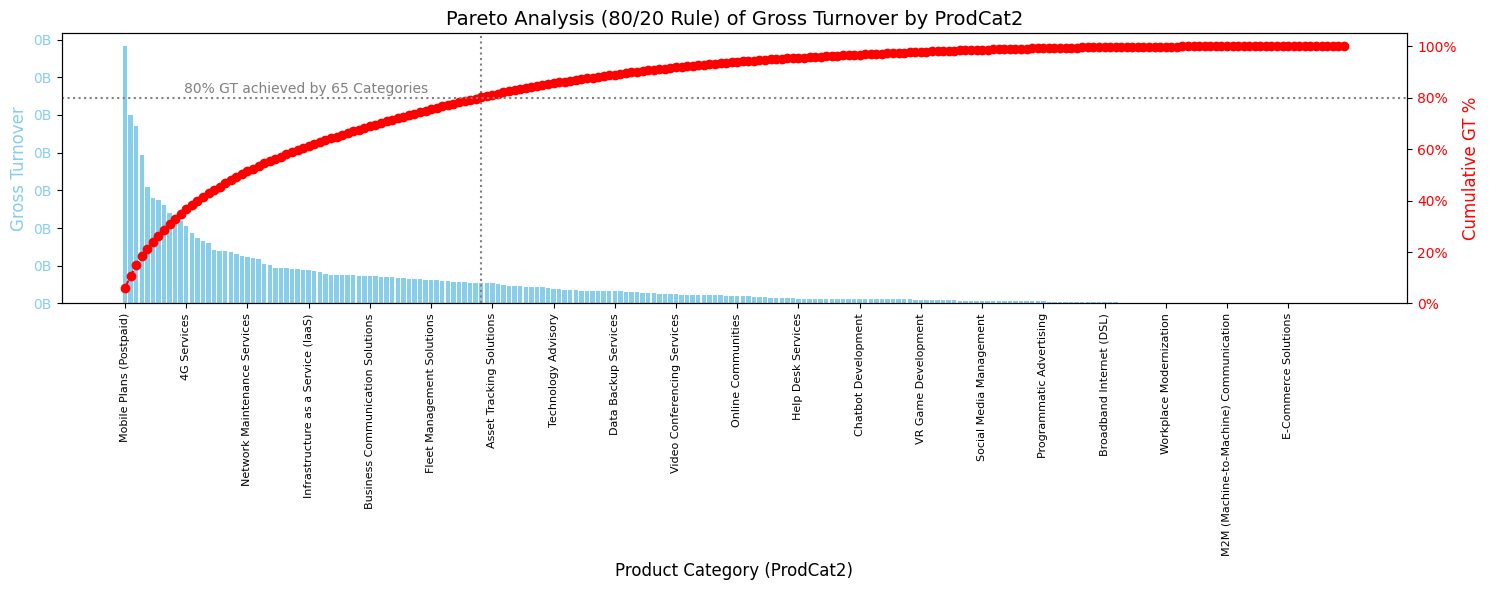

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# --- 1. Data Preparation (Ensure df_Pareto is available and sorted) ---
# Assuming df_Pareto is already created and sorted from Task 2.2

# --- 2. Setup the Plot ---
fig, ax1 = plt.subplots(figsize=(15, 6))

# --- 3. Plot Individual Gross Turnover (Bar Chart) ---
# Use the ProdCat2 as the X-axis and Gross_Turnover as the Y-axis
ax1.bar(
    df_Pareto['ProdCat2'],
    df_Pareto['Gross_Turnover'],
    color='skyblue'
)

# Label and format the left Y-axis (Turnover)
ax1.set_xlabel('Product Category (ProdCat2)', fontsize=12)
ax1.set_ylabel('Gross Turnover', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/10**9:,.0f}B')) # Format to Billions

# --- 4. Setup Secondary Axis (Cumulative Percentage Line) ---
ax2 = ax1.twinx()

# --- 5. Plot Cumulative Percentage (Line Chart) ---
ax2.plot(
    df_Pareto['ProdCat2'],
    df_Pareto['Cumulative_GT%'],
    color='red',
    marker='o',
    linestyle='--'
)

# Label and format the right Y-axis (Percentage)
ax2.set_ylabel('Cumulative GT %', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())
ax2.set_ylim(0, 105) # Set Y-limit slightly above 100%

# --- 6. Add 80/20 Rule Markers ---
# Draw horizontal line at 80%
ax2.axhline(80, color='grey', linestyle=':', linewidth=1.5, label='80% Cutoff')

# Find the category index that crosses the 80% mark (for visualization)
# This will be the first index where Cumulative_GT% >= 80
cutoff_index = (df_Pareto['Cumulative_GT%'] >= 80).idxmax()
cutoff_prodcat = df_Pareto.loc[cutoff_index, 'ProdCat2']
num_categories_80 = cutoff_index + 1

# Draw vertical line at the category index that crosses 80%
ax1.axvline(x=cutoff_index, color='grey', linestyle=':', linewidth=1.5, label=f'{num_categories_80} Categories')

# Add text annotation for the 80% line
ax2.text(num_categories_80 / 2, 82, f'80% GT achieved by {num_categories_80} Categories', color='grey', fontsize=10, ha='center')

# --- 7. Final Polish ---
plt.title('Pareto Analysis (80/20 Rule) of Gross Turnover by ProdCat2', fontsize=14)
# Only show x-ticks for the top categories to prevent crowding (e.g., first 20 or less)
max_ticks = 20
ax1.set_xticks(df_Pareto['ProdCat2'].index[::max(1, len(df_Pareto) // max_ticks)])
ax1.set_xticklabels(df_Pareto['ProdCat2'].iloc[::max(1, len(df_Pareto) // max_ticks)], rotation=90, fontsize=8)

fig.tight_layout()
plt.show()

***Task 2.4: Perform the necessary action to map the top products from Pareto Analysis to the previously created master dataframe df_Filtered and store this in a new dataframe df_Filtered_Pareto.***

*Hint: Think Joins?*

In [ ]:
# --- 1. Define Join Columns ---
# We join the transaction data (df_Filtered) with the top categories list (df_Pareto_80_categories)
JOIN_COLUMN = 'ProdCat2'

# --- 2. Filter df_Filtered based on top categories list ---
# The df_Pareto_80_categories already contains the list of top categories (64 products/categories)

# Extract the list of top ProdCat2 names from the df_Pareto_80_categories
# NOTE: If df_Pareto_80_categories was saved as a subset of df_Pareto with only the 80% rows,
# we can use its 'ProdCat2' column directly. Assuming df_Pareto_80_categories is available from Task 2.3.

top_prodcat2_list = df_Pareto_80_categories[JOIN_COLUMN].unique()

# 3. Create df_Filtered_Pareto using a filter/join
# We use .isin() which is equivalent to an inner join on the categories list.
df_Filtered_Pareto = df_Filtered[
    df_Filtered[JOIN_COLUMN].isin(top_prodcat2_list)
].copy()

# --- 4. Verification ---
initial_shape = df_Filtered.shape
final_shape = df_Filtered_Pareto.shape

print(f"df_Filtered initial shape: {initial_shape}")
print(f"Number of unique categories in df_Filtered: {df_Filtered[JOIN_COLUMN].nunique()}")
print(f"Number of top categories used for filtering: {len(top_prodcat2_list)}")

print(f"\nFinal df_Filtered_Pareto shape: {final_shape}")
print(f"Number of transactions removed: {initial_shape[0] - final_shape[0]}")
print(f"Number of unique categories remaining: {df_Filtered_Pareto[JOIN_COLUMN].nunique()}")

df_Filtered initial shape: (1004197, 23)
Number of unique categories in df_Filtered: 220
Number of top categories used for filtering: 65

Final df_Filtered_Pareto shape: (787857, 23)
Number of transactions removed: 216340
Number of unique categories remaining: 65


In [ ]:
# Check total turnover captured (should be ~80% of the df_Filtered turnover)
turnover_filtered = df_Filtered['GROSS_TURNOVER'].sum()
turnover_pareto = df_Filtered_Pareto['GROSS_TURNOVER'].sum()
print(f"Turnover captured: {(turnover_pareto / turnover_filtered) * 100:.2f}%")
print("\nFirst 5 rows of df_Filtered_Pareto:")
display(df_Filtered_Pareto.head())

Turnover captured: 80.15%

First 5 rows of df_Filtered_Pareto:


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,ACCOUNT_GROUP_TXT,CVR_Company_status,Customer_type,ProductCategoryID,ProdCat2,ProdCat1,Invoice_flag,SKU_Purchase_Flag,Sales_Year,Sales_Month
530,47154,124195645,10,2022-09-09,15082,103350,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,...,Debtors,Active,A-B,605.00,Cloud Strategy and Migration,Digital Transformation Services,1,1,2022,2022-09
531,47184,124167744,70,2022-09-07,15082,103350,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,...,Debtors,Active,A-B,686.00,Predictive Analytics,Data and Analytics,1,1,2022,2022-09
536,48255,124385024,480,2022-10-10,15082,103350,Customer Group_24,Responsible Employee_17,31592006,ZLAG,...,Debtors,Active,A-B,756.00,Mobile TV Services,Television and Entertainment,1,1,2022,2022-10
538,48315,123063686,10,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,...,Debtors,Active,A-B,809.00,4G Services,Broadband and Internet Services,1,1,2022,2022-03
539,48316,123063686,30,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 406,ZLAG,...,Debtors,Active,A-B,809.00,4G Services,Broadband and Internet Services,1,1,2022,2022-03


In the above dataset, you will notice that there are some columns that are repititive and redundant.

***Task 2.5: Remove the redundant columns and give a meaningful name to the repititive columns***

In [ ]:
# --- 1. Define Columns to Drop ---
# Based on general data cleaning and previous filtering steps:
columns_to_drop = [
    'INDEX',                        # Redundant row identifier
    'INVOICE_ITEM',                 # Item-level detail not needed for customer segmentation
    'DOCUMENT_DATE',                # We will use extracted date features, or this may be too detailed
    'Main_resposible_employee_name',# Not relevant for product purchase behavior
    'CVR_Company_status',           # Used for filtering, but not needed in final dataset
    'ACCOUNT_GROUP_TXT',            # Used for filtering, but not needed in final dataset
    'Position_type_order_line',     # Used for filtering, but not needed in final dataset
    'Invoice_flag',                 # Flag used for filtering, not needed as a feature
    'SKU_Purchase_Flag',            # Flag used for filtering, not needed as a feature
    'ProductCategoryID',            # Likely too granular, keeping the higher level ProdCat1/ProdCat2
    # We will keep Main_account and Main_account_name for now as they relate to the customer hierarchy.
]

# Ensure only existing columns are dropped
existing_cols_to_drop = [col for col in columns_to_drop if col in df_Filtered_Pareto.columns]
df_Filtered_Pareto.drop(columns=existing_cols_to_drop, inplace=True, errors='ignore')


# --- 2. Define Columns to Rename ---
# Renaming for clarity and brevity
rename_mapping = {
    'CUSTOMER_NUMBER': 'CustomerID',
    'INVOICE_NUMBER': 'InvoiceID',
    'Main_account': 'MainAccountID',
    'Main_account_name': 'MainAccountName',
    'CUSTOMER_NAME': 'CustomerName',
    'Customer_type': 'CustomerType',
    'PRODUCT': 'ProductID',
    'GROSS_TURNOVER': 'Turnover',
    'ProdCat1': 'ProductCategory1', # Assuming ProdCat1 is kept for high-level grouping
    'ProdCat2': 'ProductCategory2', # Kept for current analysis
}

df_Filtered_Pareto.rename(columns=rename_mapping, inplace=True)


# --- 3. Verification ---
print(f"df_Filtered_Pareto final shape: {df_Filtered_Pareto.shape}")
print("\nFinal column list:")
print(df_Filtered_Pareto.columns.tolist())
print("\nFirst 5 rows of final DataFrame:")
display(df_Filtered_Pareto.head())

df_Filtered_Pareto final shape: (787857, 13)

Final column list:
['InvoiceID', 'CustomerID', 'MainAccountID', 'MainAccountName', 'ProductID', 'Turnover', 'AMOUNT', 'CustomerName', 'CustomerType', 'ProductCategory2', 'ProductCategory1', 'Sales_Year', 'Sales_Month']

First 5 rows of final DataFrame:


,InvoiceID,CustomerID,MainAccountID,MainAccountName,ProductID,Turnover,AMOUNT,CustomerName,CustomerType,ProductCategory2,ProductCategory1,Sales_Year,Sales_Month
530,124195645,15082,103350,Customer Group_24,5737657492,3870.22,1,CUSTOMER_NAME_2958,A-B,Cloud Strategy and Migration,Digital Transformation Services,2022,2022-09
531,124167744,15082,103350,Customer Group_24,4441429746,286.81,1,CUSTOMER_NAME_2958,A-B,Predictive Analytics,Data and Analytics,2022,2022-09
536,124385024,15082,103350,Customer Group_24,31592006,52.31,1,CUSTOMER_NAME_2958,A-B,Mobile TV Services,Television and Entertainment,2022,2022-10
538,123063686,15082,103350,Customer Group_24,JSF 505,611.54,1,CUSTOMER_NAME_2958,A-B,4G Services,Broadband and Internet Services,2022,2022-03
539,123063686,15082,103350,Customer Group_24,JSF 406,434.45,1,CUSTOMER_NAME_2958,A-B,4G Services,Broadband and Internet Services,2022,2022-03


**This analysis gives an understanding of the top product portfolio of the company. This will be further used to perform customer segmentation.**

### 3. Customer Segmentation

The next part in this analysis is to find meaningful customer segments from the product purchase behaviour.

You will use **KMeans Clustering Algorithm** for this.

### KMeans Algorithm
The KMeans algorithm is a popular clustering technique used to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. Here are the steps involved in the KMeans algorithm:

**Initialization:**

- Choose the optimal number of clusters K, say 3 in this case.
- Randomly select K data points from the dataset as the initial centroids (cluster centers).

![image-2.png](attachment:image-2.png)

**Assignment Step:**

- Assign each data point to the nearest centroid. This is usually done by calculating the Euclidean distance between each data point and the centroids.
- Each data point is assigned to the cluster whose centroid is closest to it.

**Update Step:**

- Recalculate the centroids as the mean of all data points assigned to each cluster.
- The new centroid for each cluster is the average of the positions of all the data points in that cluster.

![image-3.png](attachment:image-3.png)

**Repeat:**

- Repeat the Assignment and Update steps until the centroids no longer change significantly or a specified number of iterations is reached.
- This convergence indicates that the clusters are stable, and the algorithm has found the optimal clustering.

![image-4.png](attachment:image-4.png)

**Termination:**

- The algorithm terminates when the centroids have stabilized (i.e., they do not change significantly between iterations) or after a pre-defined number of iterations.



To execute this analysis, **Main Account** and **ProdCat1** (is a broader product category and is at the highest level in the product hierarchy) data will be used.

*Note: ProdCat2 level data is at a very granular level and performing clustering analysis on this might not give meaningful clusters.*

To proceed with the customer segmentation analysis, you need to menaingfully prepare the data.

***Task 3.1: Transform the data to feed to the clustering algorithm***

- Create a copy of the above dataframe and save it as **df_segment**
- Create a Primary Key: Concatenate the Main Account (ID) and Main Account Name
- Execute a groupby operation to calculate the annual turnover of each customer for each product (ProdCat1)
- Calculate the % spend by each customer across different product categories

The resultant dataframe will have the following columns:
- Primary Key
- ProdCat1
- Gross_Turnover
- Customer Spend %

In [ ]:
# --- 1. Create a copy and define the Primary Key ---
df_segment = df_Filtered_Pareto.copy()

# Concatenate Main Account ID and Name to create a unique Primary Key
df_segment['Primary Key'] = df_segment['MainAccountID'].astype(str) + '_' + df_segment['MainAccountName']

# --- 2. Calculate Annual Turnover per Customer and Product Category (ProdCat1) ---
# Group by the new Primary Key and ProductCategory1, and sum the Turnover (GROSS_TURNOVER)
df_segment_grouped = df_segment.groupby(['Primary Key', 'ProductCategory1'])['Turnover'].sum().reset_index()

# Rename the aggregated turnover column
df_segment_grouped.rename(columns={'Turnover': 'Gross_Turnover'}, inplace=True)

# --- 3. Calculate Total Customer Spend ---
# Calculate the total spend (turnover) for each Primary Key across ALL categories
total_spend = df_segment_grouped.groupby('Primary Key')['Gross_Turnover'].sum().reset_index()
total_spend.rename(columns={'Gross_Turnover': 'Total_Customer_Spend'}, inplace=True)

# --- 4. Merge Total Spend back into the grouped DataFrame ---
df_segment_final = pd.merge(
    df_segment_grouped,
    total_spend,
    on='Primary Key',
    how='left'
)

# --- 5. Calculate Customer Spend % ---
df_segment_final['Customer Spend %'] = (
    df_segment_final['Gross_Turnover'] / df_segment_final['Total_Customer_Spend']
) * 100

# --- 6. Clean up and Final Result ---
# Remove the redundant Total_Customer_Spend column
df_segment = df_segment_final.drop(columns=['Total_Customer_Spend'])

# Verification: Display the required columns
print(f"Shape of the final df_segment for clustering: {df_segment.shape}")
print("\nFirst 10 rows of df_segment (showing spend percentages):")
display(df_segment.head(10))

Shape of the final df_segment for clustering: (24604, 4)

First 10 rows of df_segment (showing spend percentages):


,Primary Key,ProductCategory1,Gross_Turnover,Customer Spend %
0,100015_Customer Group_2149,Broadband and Internet Services,9250.04,44.25
1,100015_Customer Group_2149,Cloud and Hosting Services,124.69,0.60
2,100015_Customer Group_2149,Devices and Accessories,132.17,0.63
3,100015_Customer Group_2149,Digital Transformation Services,4106.33,19.65
4,100015_Customer Group_2149,Mobile Services,123.71,0.59
5,100015_Customer Group_2149,Network and Infrastructure,4982.87,23.84
6,100015_Customer Group_2149,Television and Entertainment,2182.68,10.44
7,100022_Customer Group_1631,Business Solutions,3266.52,16.45
8,100022_Customer Group_1631,Cloud and Hosting Services,1175.17,5.92
9,100022_Customer Group_1631,Devices and Accessories,2172.44,10.94


***Task 3.2: Pivot the dataset to create a matrix view of spend % of all customers on all products (ProdCat1). Save the dataframe as df_pivot. Create another dataframe df_clustering removing the primary key from the df_pivot dataframe.***

In [ ]:
# --- 1. Create df_pivot ---
# Pivot the df_segment dataframe to create the matrix view:
# Index: Primary Key (one row per customer/account)
# Columns: ProductCategory1 (one column for each product category)
# Values: Customer Spend % (the percentage of total spend dedicated to that category)
df_pivot = df_segment.pivot(
    index='Primary Key',
    columns='ProductCategory1',
    values='Customer Spend %'
)

# --- 2. Handle Missing Values (NaN) ---
# Since not every customer buys from every category, the pivot operation creates NaN values.
# For clustering (which uses distance measures), these must be filled, typically with 0,
# as a NaN here means 0% spend in that category.
df_pivot.fillna(0, inplace=True)

# --- 3. Create df_clustering ---
# Create a copy of df_pivot but without the 'Primary Key' index, as the clustering algorithm
# should only operate on the numerical spend data.
df_clustering = df_pivot.reset_index(drop=True).copy()

# --- 4. Verification ---
print(f"Shape of df_pivot (Customer-Category Matrix): {df_pivot.shape}")
print(f"Shape of df_clustering (Clustering Input Data): {df_clustering.shape}")

print("\nFirst 5 rows of df_pivot (showing Primary Key and spend matrix):")
display(df_pivot.head())

print("\nFirst 5 rows of df_clustering (ready for scaling/clustering):")
display(df_clustering.head())

df_pivot.to_csv('df_pivot.csv', index=False)
print("\nThe df_pivot has been saved.")

df_clustering.to_csv('df_clustering.csv', index=False)
print("\nThe df_clustering has been saved.")

Shape of df_pivot (Customer-Category Matrix): (3925, 11)
Shape of df_clustering (Clustering Input Data): (3925, 11)

First 5 rows of df_pivot (showing Primary Key and spend matrix):


ProductCategory1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
Primary Key,,,,,,,,,,,
100015_Customer Group_2149,44.25,0.00,0.60,0.00,0.63,19.65,0.00,0.59,23.84,0.00,10.44
100022_Customer Group_1631,0.00,16.45,5.92,0.00,10.94,0.00,12.84,4.73,9.02,38.89,1.21
100027_Customer Group_2392,34.30,0.00,1.03,1.42,0.00,0.00,0.00,35.76,4.64,0.00,22.84
100040_Customer Group_2150,0.00,5.05,4.29,0.00,0.00,0.00,0.00,0.66,89.41,0.00,0.59
100041_Customer Group_477,22.79,5.18,1.15,0.83,6.06,3.84,2.31,11.95,29.27,0.23,16.38



First 5 rows of df_clustering (ready for scaling/clustering):


ProductCategory1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
0,44.25,0.00,0.60,0.00,0.63,19.65,0.00,0.59,23.84,0.00,10.44
1,0.00,16.45,5.92,0.00,10.94,0.00,12.84,4.73,9.02,38.89,1.21
2,34.30,0.00,1.03,1.42,0.00,0.00,0.00,35.76,4.64,0.00,22.84
3,0.00,5.05,4.29,0.00,0.00,0.00,0.00,0.66,89.41,0.00,0.59
4,22.79,5.18,1.15,0.83,6.06,3.84,2.31,11.95,29.27,0.23,16.38



The df_pivot has been saved.

The df_clustering has been saved.


### The Elbow Method in KMeans Clustering

The Elbow Method is a commonly used technique to determine the optimal number of clusters (K) in KMeans clustering. It helps to balance between underfitting and overfitting by finding a point where adding more clusters doesn’t significantly improve the model performance.

![image.png](attachment:image.png)

***Explanation of the Plot***

**WCSS (Within Cluster Sum of Squares) vs. Number of Clusters:**

- The x-axis represents the number of clusters (K).
- The y-axis represents the Within-Cluster Sum of Squares (WCSS), which measures the variance within each cluster.

**Plotting WCSS for Different K Values:**

- For each value of K (from 1 to 10), the KMeans algorithm is run, and the corresponding WCSS is calculated.
- The plot shows how WCSS decreases as the number of clusters increases.

**Elbow Point:**

- The red point marked on the plot indicates the "elbow point" where the rate of decrease in WCSS slows down.
- In this example, the elbow point is at K = 3. This suggests that 3 clusters are optimal for this dataset, as adding more clusters beyond this point results in only a marginal reduction in WCSS.

**Interpretation:**

- Before the Elbow Point: Adding more clusters significantly reduces WCSS, indicating that the clusters are becoming more defined and compact.
- After the Elbow Point: The reduction in WCSS slows down, meaning that adding more clusters doesn’t significantly improve the clustering.

**Conclusion**

The Elbow Method helps to identify the optimal number of clusters by looking for the point where the WCSS starts to decrease at a slower rate, balancing model complexity and performance. In this case, the plot suggests that using 3 clusters is a good choice for the dataset.

***Task 3.3: Run K-Means clustering algorithm and identify the optimal number of clusters using Elbow Method***

Calculating WCSS for K=1 to 10...


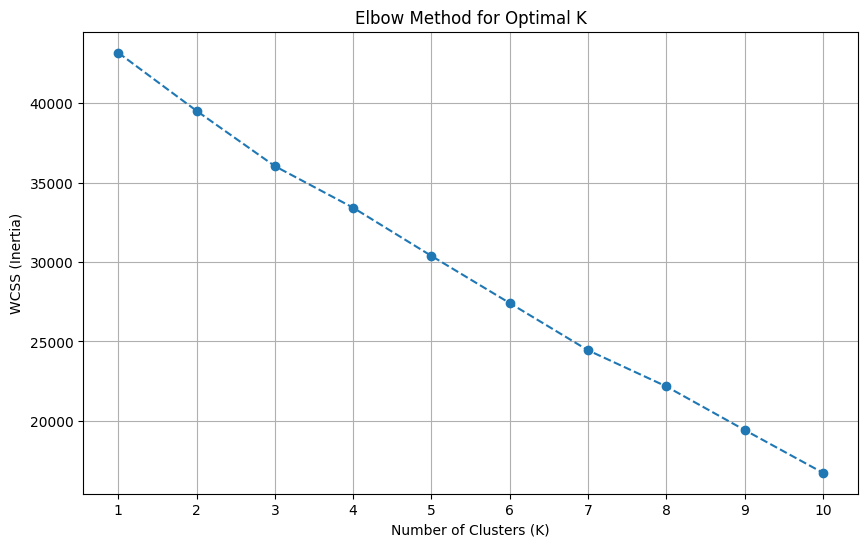


Elbow method plot saved as 'elbow_method_wcss.png'. Analyze the plot to choose the optimal K.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 1. Scale the Data ---
# Standard scaling is crucial for K-Means when features have different scales (though all are % here,
# scaling helps center the data).
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# --- 2. Calculate WCSS (Within-Cluster Sum of Squares) for K=1 to 10 ---
wcss = []
max_k = 11

print(f"Calculating WCSS for K=1 to {max_k-1}...")
for i in range(1, max_k):
    # Initialize KMeans with k clusters, a random seed for reproducibility, and fit the scaled data
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    # The inertia_ attribute gives the WCSS
    wcss.append(kmeans.inertia_)

# --- 3. Plot the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.xticks(range(1, max_k))
plt.savefig('elbow_method_wcss.png')
plt.show()
print("\nElbow method plot saved as 'elbow_method_wcss.png'. Analyze the plot to choose the optimal K.")

The Elbow Curve provides an optimal value for 'k' that is the number of clusters to be generated in the output. This value can be used as a guideline for the actual clustering run; one may vary the number of clusers in the output based on business need.

***Task 3.4: Run the KMeans algorithm with optimal number of clusters***

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- CRITICAL: Set the optimal K value based on the Elbow Method plot ---
# Example: If the elbow was at 4, set OPTIMAL_K = 4.
OPTIMAL_K = 4  # <-- **REPLACE THIS WITH YOUR CHOSEN OPTIMAL NUMBER OF CLUSTERS**

print(f"Running K-Means with OPTIMAL_K = {OPTIMAL_K}...")

# --- 1. Scale the Data (Re-do scaling as environment may have reset) ---
scaler = StandardScaler()
# Use df_clustering (numerical data)
df_scaled = scaler.fit_transform(df_clustering)

# --- 2. Run K-Means Clustering ---
kmeans = KMeans(n_clusters=OPTIMAL_K, init='k-means++', random_state=42, n_init=10)
kmeans.fit(df_scaled)

# --- 3. Assign Cluster Labels ---
# Get the cluster labels (0, 1, 2, ...)
cluster_labels = kmeans.labels_

# Add the cluster label back to the df_pivot DataFrame (indexed by Primary Key)
df_pivot['Cluster'] = cluster_labels

# Add the cluster label back to the df_segment DataFrame (the long format)
# We merge using the index of df_pivot (Primary Key)
df_segment = df_segment.merge(
    df_pivot[['Cluster']],
    left_on='Primary Key',
    right_index=True,
    how='left'
)

# --- 4. Verification ---
print("\nK-Means Clustering complete.")
print(f"Total number of customers (rows in df_pivot): {df_pivot.shape[0]}")
print(f"Shape of df_segment after adding cluster labels: {df_segment.shape}")

print("\nCluster size distribution (Number of customers per cluster):")
# Count unique Primary Keys (customers) per cluster
cluster_size_dist = df_pivot['Cluster'].value_counts().sort_index()
print(cluster_size_dist)

print("\nFirst 5 rows of df_pivot with Cluster IDs:")
display(df_pivot.head())

df_pivot.to_csv('df_pivot with k-means.csv', index=False)
print("\nThe df_pivot with k-means has been saved.")

Running K-Means with OPTIMAL_K = 4...

K-Means Clustering complete.
Total number of customers (rows in df_pivot): 3925
Shape of df_segment after adding cluster labels: (24604, 5)

Cluster size distribution (Number of customers per cluster):
Cluster
0    1652
1    1018
2     325
3     930
Name: count, dtype: int64

First 5 rows of df_pivot with Cluster IDs:


ProductCategory1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment,Cluster
Primary Key,,,,,,,,,,,,
100015_Customer Group_2149,44.25,0.00,0.60,0.00,0.63,19.65,0.00,0.59,23.84,0.00,10.44,1
100022_Customer Group_1631,0.00,16.45,5.92,0.00,10.94,0.00,12.84,4.73,9.02,38.89,1.21,0
100027_Customer Group_2392,34.30,0.00,1.03,1.42,0.00,0.00,0.00,35.76,4.64,0.00,22.84,3
100040_Customer Group_2150,0.00,5.05,4.29,0.00,0.00,0.00,0.00,0.66,89.41,0.00,0.59,0
100041_Customer Group_477,22.79,5.18,1.15,0.83,6.06,3.84,2.31,11.95,29.27,0.23,16.38,1



The df_pivot with k-means has been saved.


***Task 3.5: From the above clusters, create cluster profile***

***Task 3.5.1: Map each customers to their respective cluster in df_segment dataset***

In [ ]:
# 1. Verification of the merge operation
print(f"Shape of df_segment after cluster mapping: {df_segment.shape}")
print(f"Number of unique Primary Keys (customers): {df_segment['Primary Key'].nunique()}")
print(f"Total unique clusters mapped: {df_segment['Cluster'].nunique()}")

# 2. Display a sample of the segmented data
print("\nSample of df_segment showing Cluster assignment:")
# Select a few key columns to show the assignment
display(df_segment[['Primary Key', 'ProductCategory1', 'Gross_Turnover', 'Customer Spend %', 'Cluster']].head(10))

# 3. Check the distribution of records across clusters in the long format
print("\nDistribution of total records (transactions) across the clusters:")
print(df_segment['Cluster'].value_counts().sort_index())

Shape of df_segment after cluster mapping: (24604, 5)
Number of unique Primary Keys (customers): 3925
Total unique clusters mapped: 4

Sample of df_segment showing Cluster assignment:


,Primary Key,ProductCategory1,Gross_Turnover,Customer Spend %,Cluster
0,100015_Customer Group_2149,Broadband and Internet Services,9250.04,44.25,1
1,100015_Customer Group_2149,Cloud and Hosting Services,124.69,0.60,1
2,100015_Customer Group_2149,Devices and Accessories,132.17,0.63,1
3,100015_Customer Group_2149,Digital Transformation Services,4106.33,19.65,1
4,100015_Customer Group_2149,Mobile Services,123.71,0.59,1
5,100015_Customer Group_2149,Network and Infrastructure,4982.87,23.84,1
6,100015_Customer Group_2149,Television and Entertainment,2182.68,10.44,1
7,100022_Customer Group_1631,Business Solutions,3266.52,16.45,0
8,100022_Customer Group_1631,Cloud and Hosting Services,1175.17,5.92,0
9,100022_Customer Group_1631,Devices and Accessories,2172.44,10.94,0



Distribution of total records (transactions) across the clusters:
Cluster
0    10846
1     7002
2     1567
3     5189
Name: count, dtype: int64


***Task 3.5.2: Create a cluster profile table with the cluster label, Gross Turnover for each cluster, Number of unique customers in each cluster, % share of Gross Turnover of each cluster for each product.***

*Illustrative: Here is a snapshot of the desired cluster profile:*
![image-2.png](attachment:image-2.png)

In [ ]:
# --- 1. Calculate Cluster-level Aggregates (Turnover and Customer Count) ---
# Group by Cluster and calculate sum of Turnover and unique count of Primary Key
cluster_summary = df_segment.groupby('Cluster').agg(
    # Total Gross Turnover per cluster
    Total_Cluster_GT=('Gross_Turnover', 'sum'),
    # Number of unique customers per cluster
    Unique_Customers=('Primary Key', 'nunique')
).reset_index()

# --- 2. Calculate Total Market Turnover for Share Calculation ---
total_market_gt = cluster_summary['Total_Cluster_GT'].sum()

# --- 3. Calculate Product Share within Each Cluster ---

# Pivot the df_segment data to show sum of Turnover for each Cluster x ProductCategory1
product_share_pivot = df_segment.pivot_table(
    index='Cluster',
    columns='ProductCategory1',
    values='Gross_Turnover',
    aggfunc='sum'
).fillna(0) # Fill NaN with 0 turnover where the cluster didn't purchase a category

# Calculate the % Share of GT for each product within its own cluster
# Divide each cell value by the row sum (Total_Cluster_GT)
# We use .div() with axis=0 (row-wise operation)
product_share_profile = product_share_pivot.div(
    cluster_summary.set_index('Cluster')['Total_Cluster_GT'],
    axis=0
) * 100

# Rename product columns to reflect that they are percentage shares
product_share_profile.columns = [f'Product_Share_{col}' for col in product_share_profile.columns]
product_share_profile = product_share_profile.reset_index()


# --- 4. Final Merge and Cleanup ---

# Merge the cluster_summary with the product_share_profile
df_cluster_profile = pd.merge(
    cluster_summary,
    product_share_profile,
    on='Cluster'
)

# Calculate the % Share of Total Market GT for each cluster
df_cluster_profile['Market_Share_%'] = (
    df_cluster_profile['Total_Cluster_GT'] / total_market_gt
) * 100

# Set 'Cluster' as the index for final display
df_cluster_profile.set_index('Cluster', inplace=True)

# --- 5. Verification ---
print("--- Cluster Profile Table ---")
print(f"Total customers covered: {df_cluster_profile['Unique_Customers'].sum()}")
print(f"Total market turnover represented: ${total_market_gt:,.2f}")
print("\nFinal Cluster Profile:")
display(df_cluster_profile.round(2))

--- Cluster Profile Table ---
Total customers covered: 3925
Total market turnover represented: $887,224,871.42

Final Cluster Profile:


,Total_Cluster_GT,Unique_Customers,Product_Share_Broadband and Internet Services,Product_Share_Business Solutions,Product_Share_Cloud and Hosting Services,Product_Share_Data and Analytics,Product_Share_Devices and Accessories,Product_Share_Digital Transformation Services,Product_Share_IoT and Smart Solutions,Product_Share_Mobile Services,Product_Share_Network and Infrastructure,Product_Share_Security and Privacy,Product_Share_Television and Entertainment,Market_Share_%
Cluster,,,,,,,,,,,,,,
0,353812298.83,1652,3.03,4.19,7.69,6.68,7.06,6.16,2.07,10.25,34.27,4.25,14.35,39.88
1,339272607.33,1018,22.38,9.52,6.14,2.23,13.02,13.08,0.65,6.36,10.94,2.63,13.06,38.24
2,16948990.66,325,3.36,1.99,49.83,1.66,4.14,4.51,0.84,4.83,10.84,1.86,16.15,1.91
3,177190974.59,930,3.50,3.68,5.53,2.53,6.72,4.70,1.26,33.02,10.62,1.84,26.60,19.97


### 4. Prepare data for Tableau Dashboard

From here, you will be creating the visualizations in Tableau. But before, creating the required visualizations in Tableau, you should prepare the data.

Here is a reference of how data for visualizations for **Customer Segmentation** looks like:

![image-5.png](attachment:image-5.png)






Here is a reference of how data for visualizations for **Product Categorization** looks like:

![image-4.png](attachment:image-4.png)

where:

- Product ID: SKU ID
- Gross Turnover (sum), Amount (sum), Invoice_count (distinct count of invoices), Main_account_count (distinct count of main accounts): fields aggregated at SKU level
- Above columns with _percluster: fields aggregated at cluster level
- Frequency (%) : number of transactions the SKU appeared on, when compared to all transactions in a cluster
- Customer Prevalence (%) within cluster : Percentage of customers within a cluster who purchase the SKU



In [ ]:
import pandas as pd
import numpy as np
# --- 1. Prepare Data for Customer Segmentation (df_tableau_segment) ---

print("--- 1. Preparing Customer Segmentation Data (df_tableau_segment) ---")

# Aggregation for Customer Segment table
df_customer_segment = df_Filtered_Pareto.groupby(['MainAccountID', 'MainAccountName']).agg(
    Total_Turnover=('Turnover', 'sum'),
    Total_Amount=('AMOUNT', 'sum'),
    Invoice_Count=('InvoiceID', 'nunique'),
    Product_Diversity=('ProductID', 'nunique'),
    Transaction_Volume=('InvoiceID', 'size')
).reset_index()

# Recreate the 'Primary Key' column for merging with cluster data
df_customer_segment['Primary Key'] = df_customer_segment['MainAccountID'].astype(str) + '_' + df_customer_segment['MainAccountName']

# Merge with Cluster ID and cluster summary stats
df_tableau_segment = df_customer_segment.merge(
    df_pivot[['Cluster']].reset_index(),
    on='Primary Key',
    how='left'
)
df_tableau_segment = df_tableau_segment.merge(
    df_cluster_profile[['Unique_Customers', 'Market_Share_%', 'Total_Cluster_GT']].reset_index(),
    on='Cluster',
    how='left'
).drop(columns=['MainAccountID', 'MainAccountName'], errors='ignore')

print(f"df_tableau_segment Shape: {df_tableau_segment.shape}")

--- 1. Preparing Customer Segmentation Data (df_tableau_segment) ---
df_tableau_segment Shape: (3925, 10)


In [ ]:
# --- 2. Calculate Base SKU-Level Metrics (df_sku_level) ---

print("\n--- 2. Calculating Base SKU Metrics ---")

# Calculate metrics across the entire Pareto-filtered dataset (for SKU-level columns)
df_sku_level = df_Filtered_Pareto.groupby('ProductID').agg(
    Turnover_sum=('Turnover', 'sum'),
    Amount_sum=('AMOUNT', 'sum'),
    Invoice_count=('InvoiceID', 'nunique'),
    Main_account_count=('MainAccountID', 'nunique'),
    Total_Transactions=('InvoiceID', 'size')
).reset_index()

# Rename columns to match the Tableau reference
df_sku_level.rename(columns={
    'Turnover_sum': 'Gross Turnover (sum)',
    'Amount_sum': 'Amount (sum)',
    'Invoice_count': 'Invoice_count (distinct count of invoices)',
    'Main_account_count': 'Main_account_count (distinct count of main accounts)'
}, inplace=True)

# Add Product Category Info
sku_category_map = df_Filtered_Pareto[['ProductID', 'ProductCategory1', 'ProductCategory2']].drop_duplicates()
df_sku_level = df_sku_level.merge(sku_category_map, on='ProductID', how='left')


--- 2. Calculating Base SKU Metrics ---


In [ ]:
# --- 3. Calculate SKU-Level Metrics Per Cluster (df_sku_cluster) ---

print("\n--- 3. Calculating SKU Metrics Per Cluster ---")

# FIX: Create the 'Primary Key' column in df_Filtered_Pareto for merging
df_Filtered_Pareto['Primary Key'] = df_Filtered_Pareto['MainAccountID'].astype(str) + '_' + df_Filtered_Pareto['MainAccountName']

# Prepare temporary data frame (df_prod_temp) by merging Cluster ID
df_prod_temp = df_Filtered_Pareto.merge(
    df_pivot[['Cluster']].reset_index(),
    on='Primary Key',
    how='left'
).drop(columns=['Primary Key'], errors='ignore') # Drop the temporary key if not needed further

# Aggregate metrics at the Cluster x SKU level
df_sku_cluster = df_prod_temp.groupby(['Cluster', 'ProductID']).agg(
    Turnover_sum_cluster=('Turnover', 'sum'),
    Amount_sum_cluster=('AMOUNT', 'sum'),
    Invoice_count_cluster=('InvoiceID', 'nunique'),
    Main_account_count_cluster=('MainAccountID', 'nunique'),
    Total_Transactions_cluster=('InvoiceID', 'size') # SKU transactions in cluster
).reset_index()

# Rename columns to match the Tableau reference (with _percluster suffix)
df_sku_cluster.rename(columns={
    'Turnover_sum_cluster': 'Gross Turnover (sum)_percluster',
    'Amount_sum_cluster': 'Amount (sum)_percluster',
    'Invoice_count_cluster': 'Invoice_count (distinct count of invoices)_percluster',
    'Main_account_count_cluster': 'Main_account_count (distinct count of main accounts)_percluster'
}, inplace=True)

print(f"df_sku_cluster Shape: {df_sku_cluster.shape}")


--- 3. Calculating SKU Metrics Per Cluster ---
df_sku_cluster Shape: (137180, 7)


In [ ]:
# --- 4. Calculate Frequency and Customer Prevalence % ---

print("\n--- 4. Calculating Frequency and Prevalence Percentages ---")

# A. Frequency (%)
total_txn_per_cluster = df_prod_temp.groupby('Cluster')['InvoiceID'].size().reset_index()
total_txn_per_cluster.rename(columns={'InvoiceID': 'Cluster_Total_Txn'}, inplace=True)
df_sku_cluster = df_sku_cluster.merge(total_txn_per_cluster, on='Cluster', how='left')

df_sku_cluster['Frequency (%)'] = (
    df_sku_cluster['Total_Transactions_cluster'] / df_sku_cluster['Cluster_Total_Txn']
) * 100

# B. Customer Prevalence (%)
df_sku_cluster = df_sku_cluster.merge(
    df_cluster_profile[['Unique_Customers']].reset_index(),
    on='Cluster',
    how='left'
)

df_sku_cluster['Customer Prevalence (%) within cluster'] = (
    df_sku_cluster['Main_account_count (distinct count of main accounts)_percluster'] / df_sku_cluster['Unique_Customers']
) * 100

# Clean up helper columns
df_sku_cluster.drop(columns=['Total_Transactions_cluster', 'Cluster_Total_Txn', 'Unique_Customers'], inplace=True, errors='ignore')

print("Percentages calculated successfully.")


--- 4. Calculating Frequency and Prevalence Percentages ---
Percentages calculated successfully.


In [ ]:
# --- 5. Finalize and Save Tableau Data (df_tableau_product) ---

print("\n--- 5. Finalizing and Saving Tableau Data ---")

# Merge SKU-level data with Cluster-SKU data
df_tableau_product = df_sku_level.merge(
    df_sku_cluster,
    on='ProductID',
    how='left'
)

# Rename ProductID to match the reference image
df_tableau_product.rename(columns={'ProductID': 'Product ID'}, inplace=True)

# Final Verification
print(f"Final df_tableau_product Shape: {df_tableau_product.shape}")
print(f"Final df_tableau_segment Shape: {df_tableau_segment.shape}")

# Save to CSV for Tableau
df_tableau_segment.to_csv('df_tableau_segment.csv', index=False)
df_tableau_product.to_csv('df_tableau_product.csv', index=False)

print("\nData preparation complete. Files saved: df_tableau_segment.csv and df_tableau_product.csv.")


--- 5. Finalizing and Saving Tableau Data ---
Final df_tableau_product Shape: (137180, 15)
Final df_tableau_segment Shape: (3925, 10)

Data preparation complete. Files saved: df_tableau_segment.csv and df_tableau_product.csv.


***The End***